# Discount Analysis in E-commerce Sales: Customer Behavior and Revenue Insights

# 📄 Project Overview:
- This project analyzes customer transactions to study the influence of discounts on purchasing behavior, transaction trends, and revenue generation in an e-commerce business.
- The aim is to assess whether discounts significantly change buying behavior across different customer groups, and to identify patterns in discount usage.



# 📊 Skills Demonstrated:
- Data Cleaning and Preprocessing (Pandas, NumPy)

- Feature Engineering (Discount %, Discount Bands)

- Exploratory Data Analysis (EDA) and Visualization (Seaborn, Matplotlib)

- Customer Segmentation Analysis (Gender, Age Group, Location)

- Revenue Impact Assessment (Gross vs Net Revenue)

- Business Strategy Formulation

- ROI Calculation



# 🔎 Key Techniques Used:
- Feature Creation: Discount Percentage, Discount Slabs
- Comparative Analysis: Discount vs Non-Discount Transactions
- Segmented Analysis: Age, Gender, City, Product Category
- Time-Series Analysis: Monthly Transaction Trends
- Revenue and ROI Analysis

## Import Libraries

In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')


## Load the Data

In [286]:
data=pd.read_csv(r"C:\Users\harsh\Downloads\archive (5)\project1_df.csv")

In [287]:
data.head()

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location
0,943146,5876328741,Female,25-45,30/08/2023 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,661.004000,Credit Card,Ahmedabad
1,180079,1018503182,Male,25-45,23/02/2024 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,4463.801875,Credit Card,Bangalore
2,337580,3814082218,Other,60 and above,06/03/2022 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,1774.832575,Credit Card,Delhi
3,180333,1395204173,Other,60 and above,04/11/2020 04:41:57,Sports & Fitness,No,NaN,0.00,5695.612650,5695.612650,Debit Card,Delhi
4,447553,8009390577,Male,18-25,31/05/2022 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,1852.731500,Credit Card,Delhi


In [288]:
data.shape

(55000, 13)

In [289]:
data.columns

Index(['CID', 'TID', 'Gender', 'Age Group', 'Purchase Date',
       'Product Category', 'Discount Availed', 'Discount Name',
       'Discount Amount (INR)', 'Gross Amount', 'Net Amount',
       'Purchase Method', 'Location'],
      dtype='object')

In [290]:
#Basic Stats
data.describe()

,CID,TID,Discount Amount (INR),Gross Amount,Net Amount
count,55000.000000,5.500000e+04,55000.000000,55000.000000,55000.000000
mean,551245.593891,5.504740e+09,136.986796,3012.936606,2875.949810
std,260603.330337,2.594534e+09,165.375502,1718.431066,1726.127778
min,100009.000000,1.000163e+09,0.000000,136.454325,-351.119775
25%,323717.000000,3.252604e+09,0.000000,1562.111325,1429.551863
50%,550088.500000,5.498383e+09,0.000000,2954.266150,2814.910875
75%,776955.750000,7.747933e+09,274.115000,4342.221675,4211.407838
max,999996.000000,9.999393e+09,500.000000,8394.825600,8394.825600


## Data Cleaning and Feature Engineering

In [291]:
#Dropping Unneccary column
data=data[['TID','Gender', 'Age Group', 'Purchase Date',
       'Product Category', 'Discount Availed', 'Discount Name',
       'Discount Amount (INR)', 'Gross Amount', 'Net Amount',
       'Purchase Method', 'Location']].copy()

In [292]:
data.head()

,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location
0,5876328741,Female,25-45,30/08/2023 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,661.004000,Credit Card,Ahmedabad
1,1018503182,Male,25-45,23/02/2024 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,4463.801875,Credit Card,Bangalore
2,3814082218,Other,60 and above,06/03/2022 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,1774.832575,Credit Card,Delhi
3,1395204173,Other,60 and above,04/11/2020 04:41:57,Sports & Fitness,No,NaN,0.00,5695.612650,5695.612650,Debit Card,Delhi
4,8009390577,Male,18-25,31/05/2022 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,1852.731500,Credit Card,Delhi


In [293]:
#changing the type of date from Text to Date
data['Purchase Date']=pd.to_datetime(data['Purchase Date'])


In [294]:
#Renaming Columns
data.columns=['Transaction_ID','Gender', 'Age_Group', 'Purchase_Date', 'Product_Category',
       'Discount_Availed', 'Discount_Name', 'Discount_Amount',
       'Gross_Amount', 'Net_Amount', 'Purchase_Method', 'Location']

In [284]:
data.head()

,Transaction_ID,Gender,Age_Group,Purchase_Date,Product_Category,Discount_Availed,Discount_Name,Discount_Amount,Gross_Amount,Net_Amount,...,Location,Calculated_Net,Net_Difference,Month,Year,DayOfWeek,Discount %,Discount_Band,Calculated Net,Net Difference
0,5876328741,Female,25-45,2023-08-30 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,661.004000,...,Ahmedabad,661.0040,0.0,8,2023,Wednesday,8.865248,0-10%,661.004000,0.000000e+00
1,1018503182,Male,25-45,2024-02-23 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,4463.801875,...,Bangalore,4463.8019,0.0,2,2024,Friday,3.776467,0-10%,4463.801875,0.000000e+00
2,3814082218,Other,60 and above,2022-03-06 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,1774.832575,...,Delhi,1774.8326,0.0,3,2022,Sunday,10.649563,10-200%,1774.832575,-4.547474e-13
3,1395204173,Other,60 and above,2020-11-04 04:41:57,Sports & Fitness,No,No Discount,0.00,5695.612650,5695.612650,...,Delhi,5695.6126,0.0,11,2020,Wednesday,0.000000,NaN,5695.612650,0.000000e+00
4,8009390577,Male,18-25,2022-05-31 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,1852.731500,...,Delhi,1852.7315,0.0,5,2022,Tuesday,19.188263,10-200%,1852.731500,2.273737e-13


In [295]:
#Getting Null Values
data.isna().sum()

Transaction_ID          0
Gender                  0
Age_Group               0
Purchase_Date           0
Product_Category        0
Discount_Availed        0
Discount_Name       27585
Discount_Amount         0
Gross_Amount            0
Net_Amount              0
Purchase_Method         0
Location                0
dtype: int64

In [296]:
# Replacing Null Values with 'No Discount' in Discount Name
data['Discount_Name'].fillna('No Discount',inplace=True)

In [297]:
# Checking for null values again
data.isna().sum()

Transaction_ID      0
Gender              0
Age_Group           0
Purchase_Date       0
Product_Category    0
Discount_Availed    0
Discount_Name       0
Discount_Amount     0
Gross_Amount        0
Net_Amount          0
Purchase_Method     0
Location            0
dtype: int64

In [298]:
data.loc[data.duplicated()] #checking for duplicates

,Transaction_ID,Gender,Age_Group,Purchase_Date,Product_Category,Discount_Availed,Discount_Name,Discount_Amount,Gross_Amount,Net_Amount,Purchase_Method,Location


In [299]:
# Net Amount Validation
data['Calculated Net'] = data['Gross_Amount'] - data['Discount_Amount']
data['Net Difference'] = data['Net_Amount'] - data['Calculated Net']
if data['Net Difference'].abs().sum() > 1e-2:
    print("Warning: Some Net Amount values seem incorrect.")
else:
    print("No Incorrect Values")

No Incorrect Values


In [300]:
#Adding a Month,Year and Day column
data['Month']=data['Purchase_Date'].dt.month
data['Year']=data['Purchase_Date'].dt.year
data['DayOfWeek']=data['Purchase_Date'].dt.day_name()


In [301]:
data.head()

,Transaction_ID,Gender,Age_Group,Purchase_Date,Product_Category,Discount_Availed,Discount_Name,Discount_Amount,Gross_Amount,Net_Amount,Purchase_Method,Location,Calculated Net,Net Difference,Month,Year,DayOfWeek
0,5876328741,Female,25-45,2023-08-30 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,661.004000,Credit Card,Ahmedabad,661.004000,0.000000e+00,8,2023,Wednesday
1,1018503182,Male,25-45,2024-02-23 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,4463.801875,Credit Card,Bangalore,4463.801875,0.000000e+00,2,2024,Friday
2,3814082218,Other,60 and above,2022-03-06 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,1774.832575,Credit Card,Delhi,1774.832575,-4.547474e-13,3,2022,Sunday
3,1395204173,Other,60 and above,2020-11-04 04:41:57,Sports & Fitness,No,No Discount,0.00,5695.612650,5695.612650,Debit Card,Delhi,5695.612650,0.000000e+00,11,2020,Wednesday
4,8009390577,Male,18-25,2022-05-31 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,1852.731500,Credit Card,Delhi,1852.731500,2.273737e-13,5,2022,Tuesday


In [302]:
# Discount Percentage
data['Discount %'] = (data['Discount_Amount'] / data['Gross_Amount']) * 100

In [340]:
#Discount Bands
bin=[0,10,20,30,40,50,100]
labels=['0-10%','10-20%','20-30%','30-40%','40-50%','50%+']
data['Discount_Band']=pd.cut(data['Discount %'],bins=bin, labels=labels)

## Discount Utilization Overview and Name Performance

Discount_Availed
No     50.15%
Yes    49.85%
Name: proportion, dtype: object


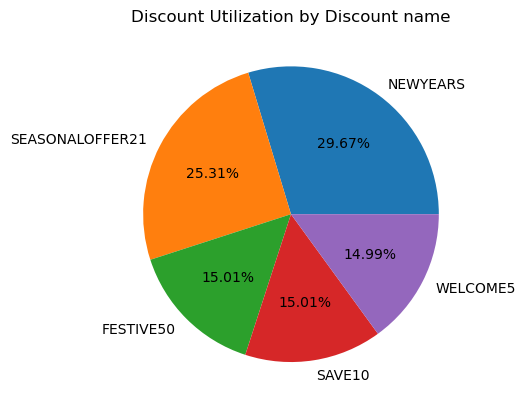

In [334]:
#Dicount Utilization Overview
discount_usage=data['Discount_Availed'].value_counts(normalize=True)*100
discount_usage=discount_usage.round(2).astype(str) + '%'
print(f"{discount_usage}")
#plot for discount coupon used
data[data['Discount_Availed']=='Yes'].Discount_Name.value_counts().plot(kind='pie',autopct="%1.2f%%",ylabel='')

plt.title('Discount Utilization by Discount name')
plt.show()

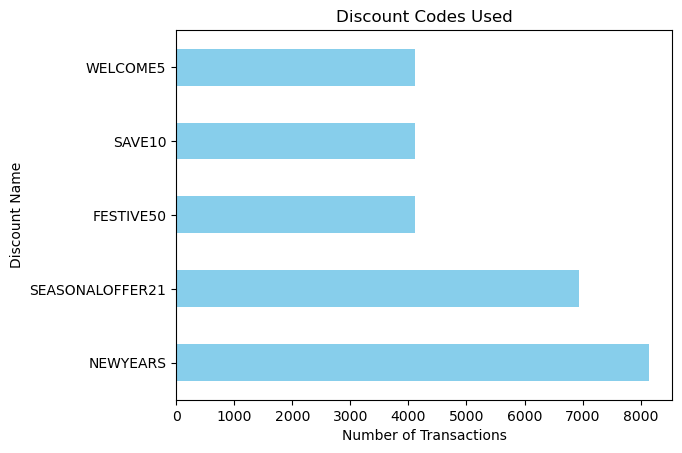

In [307]:
#Discount Name Performance
top_discounts = data[data['Discount_Availed']=='Yes']['Discount_Name'].value_counts()
top_discounts.plot(kind='barh', color='skyblue')
plt.title('Discount Codes Used')
plt.xlabel('Number of Transactions')
plt.ylabel('Discount Name')
plt.show()

## Discount Size Analysis

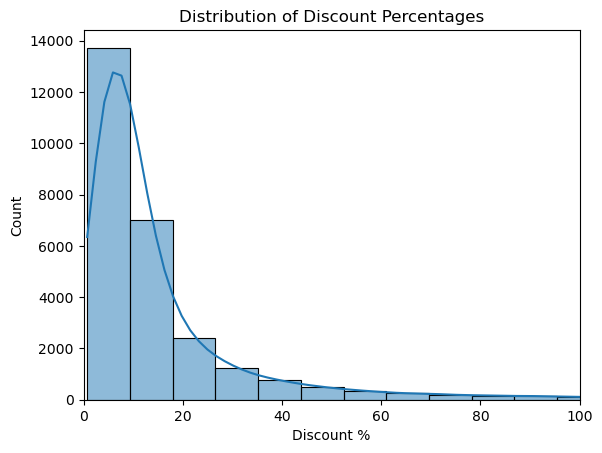

In [308]:
#Distribution of Discount Percentages
sns.histplot(data[data['Discount_Availed']=='Yes']['Discount %'], bins=40,kde=True,element='bars')
plt.title('Distribution of Discount Percentages')
plt.xlabel('Discount %')
plt.xlim(0,100)
plt.show()


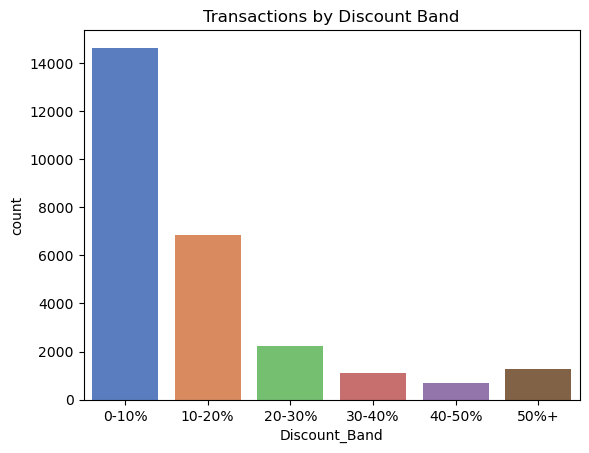

In [341]:
#Transaction by Discount Band
sns.countplot(data=data[data['Discount_Availed']=='Yes'], x='Discount_Band', order=labels,palette='muted')
plt.title('Transactions by Discount Band')
plt.show()

## Customer Demographics and Discounts

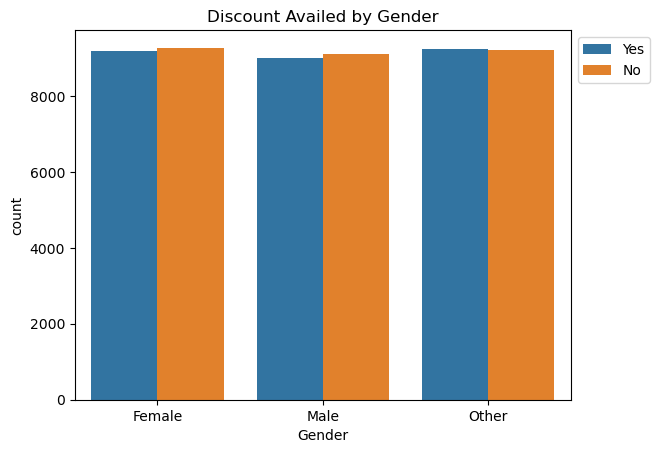

In [202]:
# Gender vs Discount Availed
sns.countplot(data=data, x='Gender', hue='Discount_Availed')
plt.title('Discount Availed by Gender')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

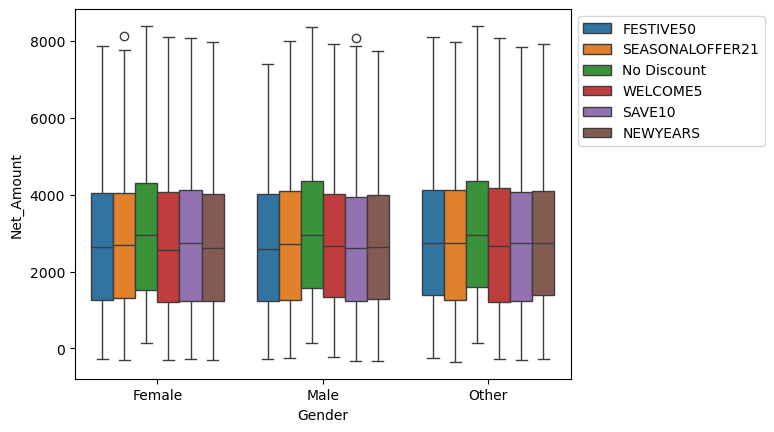

In [324]:
sns.boxplot(x=data['Gender'],y=data['Net_Amount'],hue=data['Discount_Name'])# checking the spending by Gender
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

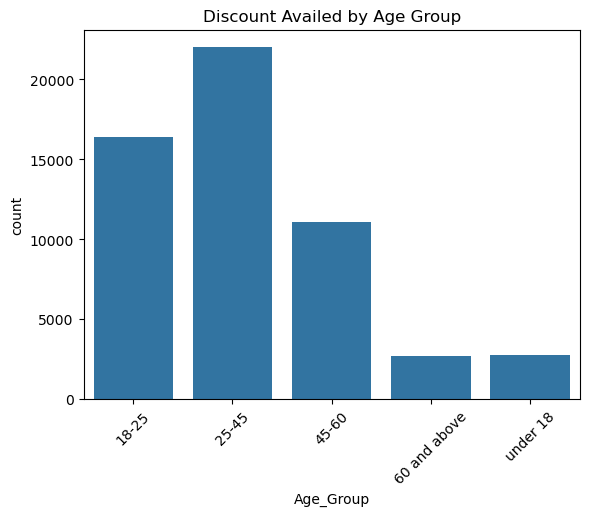

In [323]:
# Age Group vs Discount Availed
sns.countplot(data=data, x='Age_Group', order=sorted(data['Age_Group'].unique()))
plt.title('Discount Availed by Age Group')
plt.xticks(rotation=45)
plt.show()

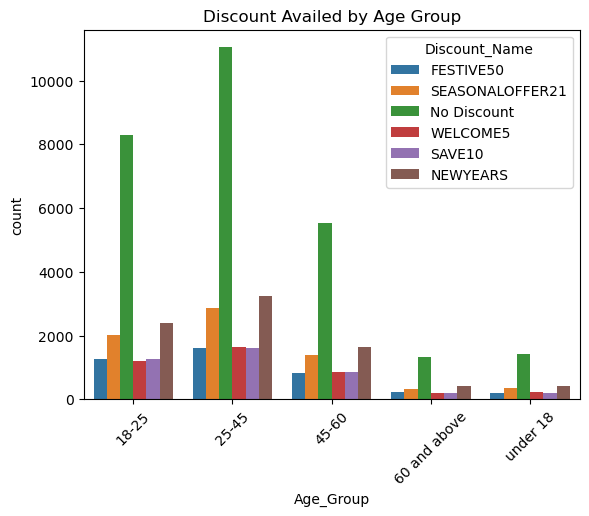

In [325]:
# Age Group vs Discount Availed
sns.countplot(data=data, x='Age_Group',hue='Discount_Name', order=sorted(data['Age_Group'].unique()))
plt.title('Discount Availed by Age Group')
plt.xticks(rotation=45)
plt.show()

## Location-Based Discount Behavior

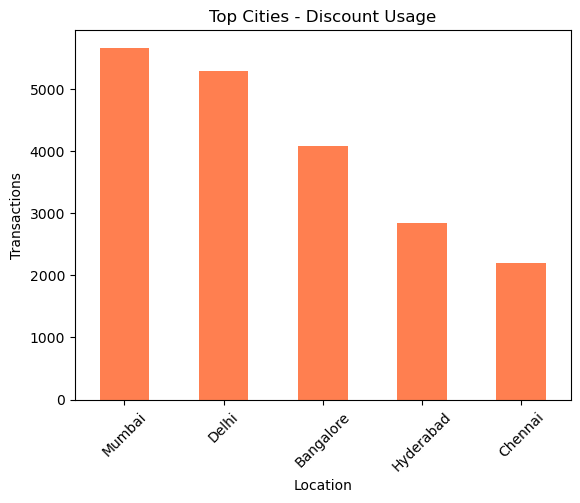

In [326]:
# Top Cities - Discounted Transactions
location_discount = data[data['Discount_Availed']=='Yes']['Location'].value_counts().head()
location_discount.plot(kind='bar', color='coral')
plt.title('Top Cities - Discount Usage')
plt.ylabel('Transactions')
plt.xticks(rotation=45)
plt.show()


## Product Based Revenue and Discount Behaviour

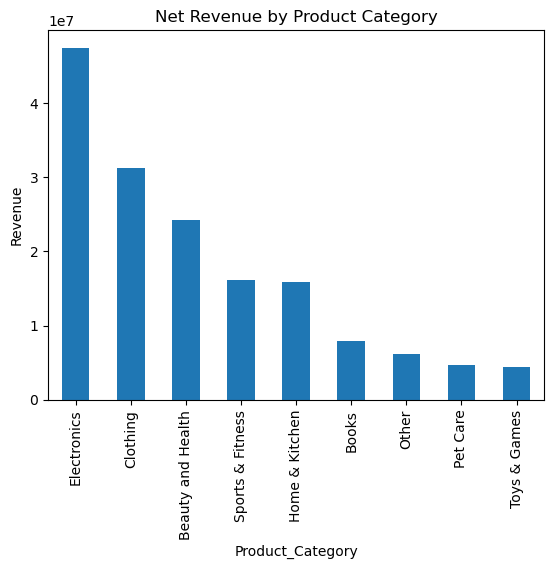

In [243]:
category_revenue = data.groupby('Product_Category')['Net_Amount'].sum().sort_values(ascending=False)
category_revenue.plot(kind='bar')
plt.title('Net Revenue by Product Category')
plt.ylabel('Revenue')
plt.show()

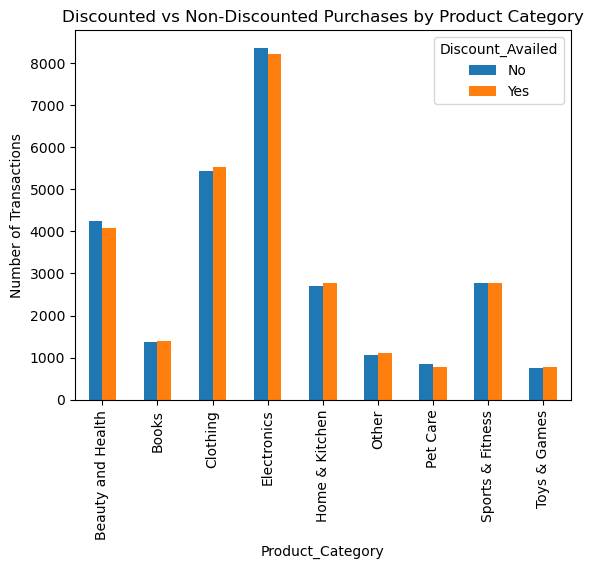

In [249]:
# Discount vs No Discount by Category
discount_category = pd.crosstab(data['Product_Category'], data['Discount_Availed'])
discount_category.plot(kind='bar', stacked=False)
plt.title('Discounted vs Non-Discounted Purchases by Product Category')
plt.ylabel('Number of Transactions')
plt.show()


## Purchasing Behavior by Months

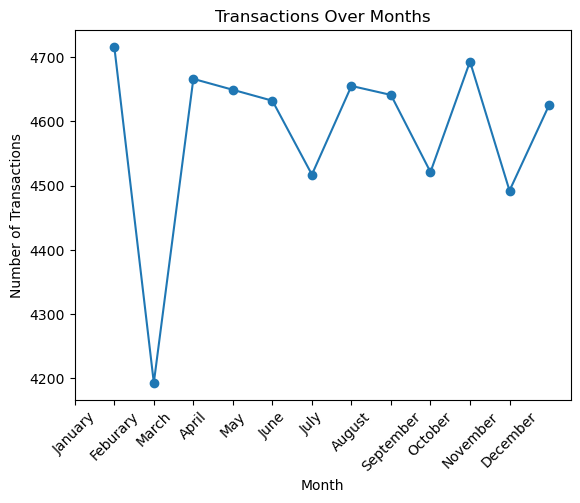

In [347]:
# Transactions per Month
monthly_sales = data['Month'].value_counts().sort_index()
monthly_sales.plot(kind='line', marker='o')
plt.title('Transactions Over Months')
plt.xticks(ticks=range(0,12),labels=['January','Feburary','March','April','May','June','July','August','September','October','November','December'],rotation=45)
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()


## Preferred Payement Methods and Discount Relation

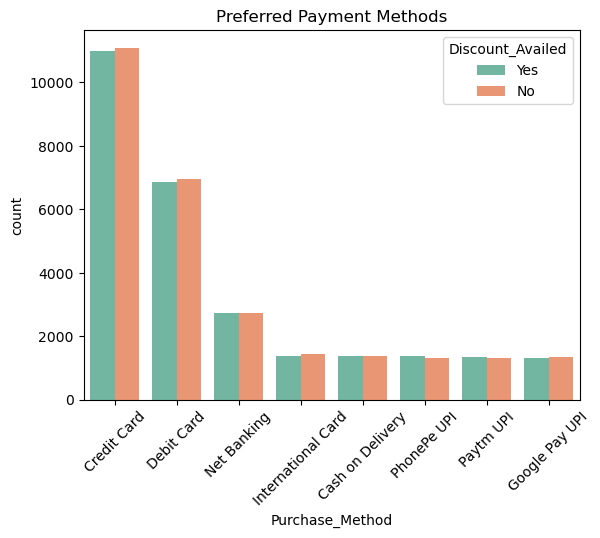

In [253]:
#Payment Method Prefrences
sns.countplot(data=data, x='Purchase_Method', order=data['Purchase_Method'].value_counts().index,hue='Discount_Availed',palette='Set2')
plt.title('Preferred Payment Methods')
plt.xticks(rotation=45)
plt.show()

## Gross vs Net Revenue Impact

In [240]:
# Revenue Comparison
gross_discounted = data[data['Discount_Availed']=='Yes']['Gross_Amount'].sum()
net_discounted = data[data['Discount_Availed']=='Yes']['Net_Amount'].sum()


net_nondiscounted = data[data['Discount_Availed']=='No']['Net_Amount'].sum()
gross_discounted=gross_discounted.round(2)
net_discounted=net_discounted.round(2)
net_nondiscounted=net_nondiscounted.round(2)


print(f"Gross Revenue (Discounted): ₹{gross_discounted}")
print(f"Net Revenue (Discounted): ₹{net_discounted}")
print(f"Net Revenue (No Discount): ₹{net_nondiscounted}")


Gross Revenue (Discounted): ₹82587441.38
Net Revenue (Discounted): ₹75053167.61
Net Revenue (No Discount): ₹83124071.95


## Discount ROI Calculation

In [241]:
# ROI = Net Revenue / Discount Cost
discount_cost = data['Discount_Amount'].sum()
total_net_revenue = data['Net_Amount'].sum()

roi = total_net_revenue / discount_cost
print(f"Overall Discount ROI: {roi:.2f}")


Overall Discount ROI: 20.99


### 📈 Insights & Results

| Topic                          | Key Findings                                                                |
|-------------------------------|----------------------------------------------------------------------------------|
| Discount vs No Discount Behaior | No significant difference observed overall across most categories         |
| Top Discount Names Used       | 1. NewYears, 2. SeasonalOffer21, 3. Festive50                                |
| Discount Percentage Range     | Most discounts fall within 0–10%, then 10–20%                                |
| Age Group Transaction Trends  | 25–45 age group had the highest transaction volume, followed by 18–25        |
| Discount Use by Age Group     | Certain discounts were more popular in specific age brackets                 |
| City-wise Discount Usage      | Mumbai had the highest discount usage                                        |
| Top Product Category          | Electronics had the highest transaction volume                               |
| Product Category Discount Behavior | Clothing, Home & Kitchen showed slightly higher discount avaiing rates  |
| Month-wise Transaction Trends | January and December saw the highest transactions; February the lowest       |
| Payment Methods               | Credit Cards dominated purchases, but UPI users availed discounts more       |
| ROI on Discounting            | Overall Discount ROI was 20.99, indicating successful returns on disount spending |
pending


## 🎯 Business Recommendations:
- **Focus on Best-Performing Discount Campaigns**:
Prioritize campaigns like NewYears, SeasonalOffer21, and Festive50 as they generated high engagement.

- **Smart Discount Structuring**:
Keep discount offers mainly in the 0–20% slab where customer engagement is already strong without eroding margins.

- **Demographic Tailored Marketing**:
Target 25–45 age group most heavily in campaigns, with occasional tailoring for younger 18–25 customers.

- **City-Specific Promotions**:
Focus discount-driven campaigns on high-performing cities like Mumbai to maximize conversion.

- **Category-Specific Discounts**:
Apply mild discounts in Clothing and Home & Kitchen where customers showed a slightly higher inclination toward availing discounts.

- **Payment Method Incentives**:
Encourage UPI payments through targeted discounting since customers using UPI were more likely to avail offers.

- **Optimize Timing**:
Launch major discount campaigns in December and January to align with peak customer buying periods.